# Spam Detection Model Evaluation

This notebook demonstrates how to evaluate different Hugging Face models for spam detection.


In [1]:
# Import required functions from our evaluation script
from inference_evaluation import load_sms_dataset, load_email_dataset, sample_balanced_data, evaluate_model

# Additional imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Prepare Dataset

In [3]:
# Load SMS dataset
texts, labels = load_sms_dataset("data/cleaned/telegram_dataset_processed.csv")

# Sample balanced dataset
# Increase n_samples for more thorough evaluation
texts, labels = sample_balanced_data(texts, labels, n_samples=300)



Sampled balanced dataset:
Total samples: 300
Spam samples: 150
Non-spam samples: 150


## Define Models to Test

Here we define different models to evaluate. Each model might have different label names for spam/non-spam.


In [4]:
# Define models to test with their respective spam labels
models_to_test = [
    {"code": 1, "name": "mshenoda/roberta-spam", "spam_label": "LABEL_1"},
    {"code": 2, "name": "mariagrandury/distilbert-base-uncased-finetuned-sms-spam-detection", "spam_label": "LABEL_1"},
    {"code": 3, "name": "cybersectony/phishing-email-detection-distilbert_v2.1", "spam_label": "LABEL_1"},
    {"code": 4, "name": "mrm8488/bert-tiny-finetuned-sms-spam-detection", "spam_label": "LABEL_1"},
    {"code": 5, "name": "./results", "spam_label": "LABEL_1"},
]
# Store results for comparison
results_dict = {}


## Evaluate Models


In [6]:
# Evaluate each model and store results
for model in models_to_test:
    print(f"\nEvaluating {model['name']}...")
    try:
        results = evaluate_model(texts, labels, model_name=model['name'], spam_label=model['spam_label'])
        results_dict[model['name']] = results
    except Exception as e:
        print(f"Error evaluating {model['name']}: {e}")
        continue



Evaluating mshenoda/roberta-spam...


Device set to use mps:0
Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors



Model Evaluation Results:
-------------------------
Accuracy: 1.0000

Detailed Metrics:
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Evaluating mariagrandury/distilbert-base-uncased-finetuned-sms-spam-detection...


Device set to use mps:0



Model Evaluation Results:
-------------------------
Accuracy: 0.6833

Detailed Metrics:
Precision: 0.6752
Recall: 0.7067
F1 Score: 0.6906

Evaluating cybersectony/phishing-email-detection-distilbert_v2.1...


Device set to use mps:0



Model Evaluation Results:
-------------------------
Accuracy: 0.7367

Detailed Metrics:
Precision: 0.6606
Recall: 0.9733
F1 Score: 0.7871

Evaluating mrm8488/bert-tiny-finetuned-sms-spam-detection...


Device set to use mps:0
Device set to use mps:0



Model Evaluation Results:
-------------------------
Accuracy: 0.6367

Detailed Metrics:
Precision: 0.6519
Recall: 0.5867
F1 Score: 0.6175

Evaluating ./results...

Model Evaluation Results:
-------------------------
Accuracy: 0.9767

Detailed Metrics:
Precision: 0.9931
Recall: 0.9600
F1 Score: 0.9763


## Compare Results


In [7]:
# Create comparison DataFrame
comparison_data = []
for model_name, results in results_dict.items():
    comparison_data.append({
        'Model': model_name.split('/')[-1],
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1 Score': results['f1']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,roberta-spam,1.000000,1.000000,1.000000,1.000000
1,distilbert-base-uncased-finetuned-sms-spam-det...,0.683333,0.675159,0.706667,0.690554
2,phishing-email-detection-distilbert_v2.1,0.736667,0.660633,0.973333,0.787062
3,bert-tiny-finetuned-sms-spam-detection,0.636667,0.651852,0.586667,0.617544
4,results,0.976667,0.993103,0.960000,0.976271


## Visualize Results


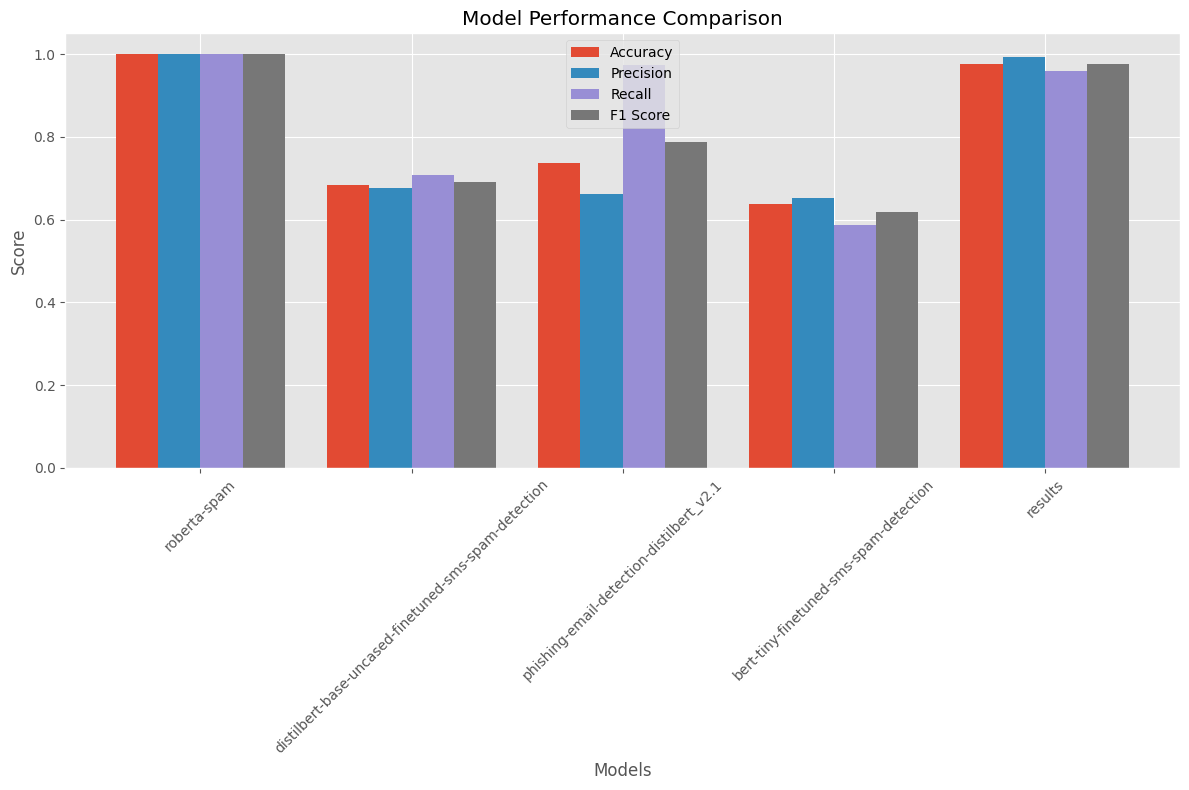

In [8]:
# Set up the plot style
plt.style.use('ggplot')

plt.figure(figsize=(12, 8))

# Create bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, comparison_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
